In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import random
np.random.seed(123)

In [5]:
from google.colab import files 
uploaded=files.upload()

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity.csv


## Data: Online News Popularity

In [6]:
data= pd.read_csv("OnlineNewsPopularity.csv",delimiter =",", header=0)

In [7]:
data.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [8]:
data=data.select_dtypes(include=["int64","float64"])

In [9]:
data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [10]:
print("Tengo N =",len(data), "instancias")

Tengo N = 39644 instancias


In [11]:
print("Tengo N =",len(data.columns), "atributos")

Tengo N = 60 atributos


In [12]:
perdido=data[data.isna().any(axis=1)] # Ninguno

In [13]:
print("Tengo N=", len(perdido), "datos perdidos")

Tengo N= 0 datos perdidos


In [14]:
length = len(data)
for i in data.columns[:-3]:
    num = int(np.random.randint(0,4)/100*length)
    idx_replace = np.random.randint(0, length-1, num)
    data.loc[idx_replace, i] = np.nan

## Imputando data missing

In [15]:
data[data.isna().any(axis=1)]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.6,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.8,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,NaN,-0.6,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.5,-0.050000,0.454545,0.136364,0.045455,0.136364,505
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,...,0.100000,1.00,-0.224479,-0.5,-0.050000,0.000000,0.000000,0.500000,0.000000,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39637,8.0,13.0,1629.0,0.425711,1.0,0.606092,15.0,12.0,6.0,0.0,...,0.033333,1.00,-0.429534,-1.0,-0.050000,0.783333,-0.600000,0.283333,0.600000,1400
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900


In [16]:
data.isnull().sum()

 timedelta                         782
 n_tokens_title                      0
 n_tokens_content                    0
 n_unique_tokens                  1170
 n_non_stop_words                 1174
 n_non_stop_unique_tokens          789
 num_hrefs                           0
 num_self_hrefs                    784
 num_imgs                         1172
 num_videos                          0
 average_token_length             1169
 num_keywords                      394
 data_channel_is_lifestyle         393
 data_channel_is_entertainment     392
 data_channel_is_bus              1168
 data_channel_is_socmed            393
 data_channel_is_tech                0
 data_channel_is_world            1174
 kw_min_min                       1172
 kw_max_min                        784
 kw_avg_min                        788
 kw_min_max                        786
 kw_max_max                        781
 kw_avg_max                       1173
 kw_min_avg                          0
 kw_max_avg              

Teniendo en cuenta de que no se encontraron datos faltantes en la base de datos, se procedió a agregar Nan de forma aleoria en cada variable. se seleccionó la varible: n_non_stop_words, por ser una de las variables donde más datos faltantes aleatorios se registraron.

In [17]:
data2=data.copy()
data3=data.copy()

In [18]:
def impute_nan_meanmedian(df, variable, value):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df

In [19]:
data2.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [20]:
data2[" n_non_stop_words"].describe() #maximos y minimos por variable

count    38470.000000
mean         0.997323
std          5.310365
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64

El valor de la variable se encuentra entre  0 y 1042 y su media se ubica en 0.99

In [21]:
impute_nan_meanmedian(data2," n_non_stop_words","mean")

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1.000000
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.80,NaN,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997323
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.50,-0.205246,-0.500,-0.012500,NaN,0.000000,0.500000,0.000000,1100,1.000000


In [22]:
impute_nan_meanmedian(data2," n_non_stop_words","median")

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean,n_non_stop_words_median
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1.000000,1.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000,1.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000,1.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,NaN,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000,1.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997323,1.0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000,1.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000,1.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,-0.205246,-0.500,-0.012500,NaN,0.000000,0.500000,0.000000,1100,1.000000,1.0


In [23]:
impute_nan_random(data2," n_non_stop_words",0.5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean,n_non_stop_words_median,n_non_stop_words_random_fixed
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1.000000,1.0,1.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000,1.0,1.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000,1.0,1.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000,1.0,1.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997323,1.0,0.5
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000,1.0,1.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000,1.0,1.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,-0.500,-0.012500,NaN,0.000000,0.500000,0.000000,1100,1.000000,1.0,1.0


In [24]:
impute_nan_random(data2," n_non_stop_words",-9)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,n_non_stop_words_mean,n_non_stop_words_median,n_non_stop_words_random_fixed,n_non_stop_words_random
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1.000000,1.0,1.0,1.000000
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.000000,1.0,1.0,1.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.000000,1.0,1.0,1.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.000000,1.0,1.0,1.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1.000000,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,11.0,346.0,0.529052,NaN,0.684783,9.0,7.0,1.0,1.0,...,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0.997323,1.0,0.5,456.941983
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1.000000,1.0,1.0,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1.000000,1.0,1.0,1.000000
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,-0.012500,NaN,0.000000,0.500000,0.000000,1100,1.000000,1.0,1.0,1.000000


In [25]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(data3)
# transform the dataset
Xtrans = imputer.transform(data3)

In [26]:
Xtrans

array([[7.31000000e+02, 1.20000000e+01, 2.19000000e+02, ...,
        0.00000000e+00, 1.87500000e-01, 5.93000000e+02],
       [7.31000000e+02, 9.00000000e+00, 2.55000000e+02, ...,
        5.00000000e-01, 0.00000000e+00, 7.11000000e+02],
       [7.31000000e+02, 9.00000000e+00, 2.11000000e+02, ...,
        5.00000000e-01, 0.00000000e+00, 1.50000000e+03],
       ...,
       [8.00000000e+00, 1.00000000e+01, 4.42000000e+02, ...,
        4.54545455e-02, 1.36363636e-01, 1.90000000e+03],
       [8.00000000e+00, 6.00000000e+00, 6.82000000e+02, ...,
        5.00000000e-01, 0.00000000e+00, 1.10000000e+03],
       [8.00000000e+00, 1.00000000e+01, 1.57000000e+02, ...,
        1.66666667e-01, 2.50000000e-01, 1.30000000e+03]])

In [27]:
Xtrans=pd.DataFrame(Xtrans,columns=data3.columns)

In [28]:
Xtrans

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.197595,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,228.6,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800.0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.230000,0.000000,0.500000,0.000000,1100.0


## Some plots

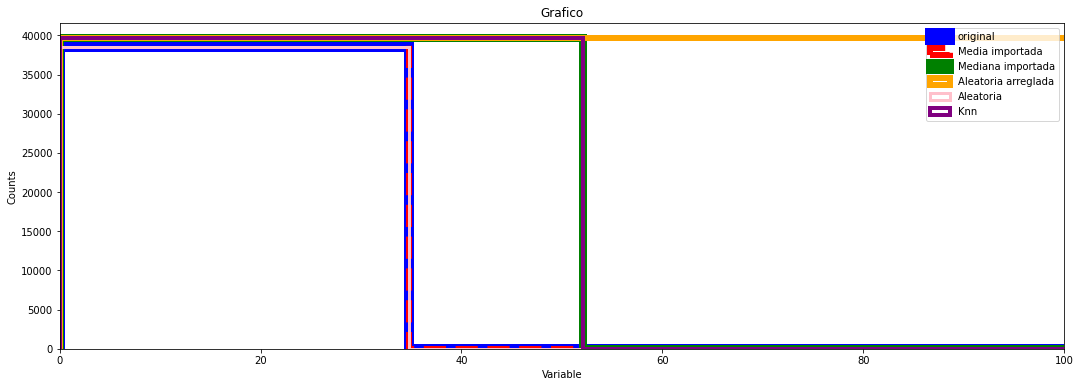

In [29]:
plt.figure(figsize=(18,6))
plt.hist(data[" n_non_stop_words"],label="original",color="blue", histtype="step", bins=30, lw= 10)
plt.hist(data2[" n_non_stop_words_mean"],label="Media importada",color="red",histtype="step", bins=30, lw=6, linestyle="--")
plt.hist(data2[" n_non_stop_words_median"],label="Mediana importada",color="green",histtype="step", bins=20, lw=8)
plt.hist(data2[" n_non_stop_words_random_fixed"],label="Aleatoria arreglada",color="orange",histtype="step", bins=10, lw=6)
plt.hist(data2[" n_non_stop_words_random"],label="Aleatoria",color="pink",histtype="step", bins=30, lw=3)
plt.hist(Xtrans[" n_non_stop_words"],label="Knn",color="purple", histtype="step", bins=20, lw=4)
plt.xlim(0,100)
plt.xlabel("Variable")
plt.ylabel("Counts")
plt.title("Grafico")
plt.legend()
plt.show()


Posterior al proceso de ajuste de la información faltante, para la variable n_non_stop_words se encontró que la metodologia que más se ajusta a la distribución real es la generada de forma aleatoria, lo que se evidencia en la imagen anterior al revisar las lineas azul(original) y la linea rosada (aleatoria).  
